In [1]:
import clip

import os
import torch
from PIL import Image
from transformers import GPT2Tokenizer


from ood_detection.models.dummy_zoc import CaptionGenerator
from ood_detection.config import Config

/home/fmeyer/miniconda3/envs/ood/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
prefix_length = 10
model_path = os.path.join(Config.MODELS, 'generator_weights.pt')
print(os.path.exists(model_path))

True


In [3]:
clip, preprocess = clip.load("ViT-B/32")
clip.eval()
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [4]:
generator = CaptionGenerator(model_path,
                             clip,
                             tokenizer,
                             prefix_length)

In [5]:
image = 'stanford_cars/cars_train/02314.jpg'
image_path = os.path.join(Config.DATAPATH, image)

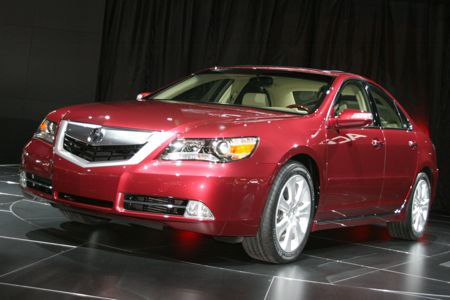

In [6]:
im = Image.open(image_path)
display(im)

In [7]:
torch_image = preprocess(im).unsqueeze(0).to(device)
captions = generator.generate_caption(torch_image, False)
captions

/mnt/c/users/fmeyer/git/ood-detection/src/ood_detection/models/captioning_utils.py:47: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_tokens_source = next_tokens // scores_sum.shape[1]


In [9]:
captions

'automobile model unveiled at show.'